# 04. Simple decision trees

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import graphviz
from sklearn.tree import export_graphviz
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
with np.load("train_data.npz",allow_pickle=False) as npztrain:
    train_data = dict(npztrain.items())

with np.load("valid_data.npz",allow_pickle=False) as npzvalid:
    valid_data = dict(npzvalid.items())
    
with np.load("test_data.npz",allow_pickle=False) as npztest:
    test_data = dict(npztest.items())
    

In [3]:
X_train,y_train = train_data.values()
X_valid,y_valid = valid_data.values()
X_test,y_test = test_data.values()

Let's build our tree with a depth of 3

In [4]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
print("Training accuracy : {:.1f}%".format(100*dt.score(X_train,y_train)))
print("Validation accuracy : {:.1f}%".format(100*dt.score(X_valid,y_valid)))


Training accuracy : 76.5%
Validation accuracy : 69.8%


In [5]:
dot_data = export_graphviz(dt,proportion=True)

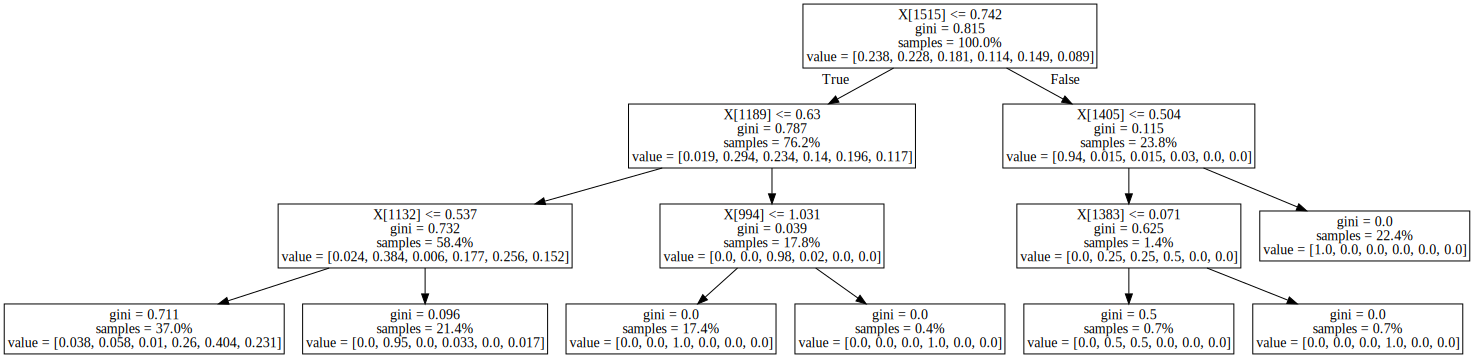

In [6]:
graphviz.Source(dot_data)

Let's try reducing the dimensionality with PCA, we try out different numbers of components and look for the best results with a grid search.

In [7]:
grid = {
    "pca__n_components": [1,2,3,4,5,10,15]
}
dt_with_pca = Pipeline([
    ("pca",PCA()),
    ("dt", DecisionTreeClassifier(max_depth=3))
])

gs_dt_pca = GridSearchCV(dt_with_pca, grid, cv=5, return_train_score=True)
gs_dt_pca.fit(X_train,y_train)
print("Training accuracy : {:.1f}%".format(100*gs_dt_pca.score(X_train,y_train)))
print("Validation accuracy : {:.1f}%".format(100*gs_dt_pca.score(X_valid,y_valid)))
print("Best number of components :",gs_dt_pca.best_params_["pca__n_components"])

Training accuracy : 79.7%
Validation accuracy : 75.5%
Best number of components : 3


We see that we get much better results by reducing the dimensionality !

In [8]:
dt_with_pca_3 = Pipeline([
    ("pca",PCA(n_components=3)),
    ("dt", DecisionTreeClassifier(max_depth=3))
])
dt_with_pca_3.fit(X_train,y_train)
print("Validation accuracy : {:.1f}%".format(100*dt_with_pca_3.score(X_valid,y_valid)))

Validation accuracy : 75.5%


Finally let's get the test results

In [9]:
dt_test_acc = 100*dt_with_pca_3.score(X_test,y_test)
print("Test accuracy : {:.1f}%".format(dt_test_acc))

Test accuracy : 76.0%


In [10]:
%store dt_test_acc

Stored 'dt_test_acc' (float64)
